- __ID__ - Unique number for each athlete
- __Name__ - Athlete's name
- __Sex__ - M or F
- __Age__ - Integer
- __Height__ - In centimeters
- __Weight__ - In kilograms
- __Team__ - Team name
- __NOC__ - National Olympic Committee 3-letter code
- __Games__ - Year and season
- __Year__ - Integer
- __Season__ - Summer or Winter
- __City__ - Host city
- __Sport__ - Sport
- __Event__ - Event
- __Medal__ - Gold, Silver, Bronze, or NA

In [2]:
import numpy as np
import pandas as pd

In [3]:
# не меняем путь!
PATH = 'https://github.com/aksenov7/Kaggle_competition_group/blob/master/athlete_events.csv.zip?raw=true'

__0. Откройте файл используя необходимые параметры и не меняя переменную PATH__

In [29]:
data = pd.read_csv(PATH, compression='zip').drop_duplicates()
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


__1. Сколько лет было самым молодым мужчинам и женщинам-участникам Олимпийских игр 1992 года ?__
- 16 и 15
- 14 и 13 
- 13 и 11
- 11 и 12

In [30]:
min_age_man = data[(data['Year'] == 1992) & (data['Sex'] == 'M')]['Age'].min()
min_age_woman = data[(data['Year'] == 1992) & (data['Sex'] == 'F')]['Age'].min()
print(min_age_man)
print(min_age_woman)

11.0
12.0


__2. Каков был процент баскетболистов-мужчин среди всех мужчин-участников Олимпийских игр 2012 года? Округлите ответ до первого десятичного знака.__

Здесь и далее при необходимости отбрасывайте дублированных спортсменов, чтобы считать только уникальных . 
- 0.2
- 1.5 
- 2.5
- 7.7

In [31]:
basketball_players_count = len(data[
                              (data['Year'] == 2012)
                              & (data['Sex'] == 'M')
                              & (data['Sport'] == 'Basketball')])
all_players_count = len(data[                             
                        (data['Year'] == 2012)
                        & (data['Sex'] == 'M')])
print( round(basketball_players_count / all_players_count * 100, 3), '%' )

2.027 %


__3. Каковы среднее и стандартное отклонение роста теннисисток, участвовавших в Олимпийских играх 2000 года? Округлите ответ до первого десятичного знака.__

- 171.8 и 6.5
- 179.4 и 10
- 180.7 и 6.7
- 182.4 и 9.1 

In [37]:
df = data[(data["Year"]==2000) 
            & (data["Sex"]=="F") 
            & (data["Sport"]=="Tennis")]["Height"]
print( df.mean() )
print( round(df.std(), 3) )

171.792
6.459


__4. Найдите спортсмена, который участвовал в Олимпийских играх 2006 года, с наибольшим весом среди других участников той же Олимпиады. Каким спортом он или она занимался?__

- Judo
- Bobsleigh 
- Skeleton
- Boxing

In [45]:
max_weight = data[(data['Year'] == 2006)]['Weight'].max()
print( data[(data['Year'] == 2006) & (data['Weight'] == max_weight)]['Sport'] )


8102    Skeleton
Name: Sport, dtype: object


__5. Сколько раз John Aalberg участвовал в Олимпийских играх в разные годы?__

Один год - это один раз. Неважно сколько участий внутри одного года
- 0
- 1 
- 2
- 3 

In [48]:
len( data[data['Name'] == 'John Aalberg'].drop_duplicates(['Year']) )

2

__6. Сколько золотых медалей по теннису выиграли спортсмены сборной Switzerland на Олимпиаде-2008? Считайте каждую медаль от каждого спортсмена.__

- 0
- 1 
- 2
- 3 

In [50]:
print( len( data[(data['Year'] == 2008)
                  & (data['Sport'] == 'Tennis')
                  & (data['Team'] == 'Switzerland')
                  & (data['Medal'] == 'Gold')] ) )

2


__7. Правда ли, что на Олимпийских играх 2016 Spain выиграла меньше медалей, чем Италия?__ 

- Да
- Нет

In [65]:
italy_medals = len( data[(data['Year'] == 2016) & (data['Team'] == 'Spain') & (pd.notna(data['Medal'])) ] )
spain_medals = len( data[(data['Year'] == 2016) & (data['Team'] == 'Italy') & (pd.notna(data['Medal'])) ] )
print(spain_medals)
print(italy_medals)
print( spain_medals < italy_medals)

70
43
False


__8. К какой возрастной категории принадлежало наименьшее и наибольшее количество участников Олимпиады-2008?__

- [45-55] и [25-35) соответственно
- [45-55] и [15-25) соответственно
- [35-45) и [25-35) соответственно
- [45-55] и [35-45) соответственно

[45-55] и [15-25) соответственно


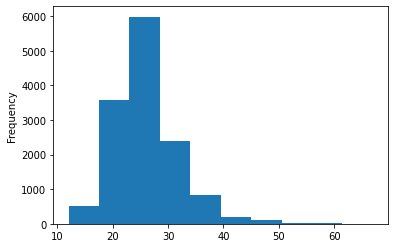

In [95]:
data[data['Year'] == 2008]['Age'].plot(x='Age', kind='hist')
print('[45-55] и [15-25) соответственно')

__9. Правда ли, что в Atlanta проводились летние Олимпийские игры? Правда ли, что в Squaw Valley проводились зимние Олимпийские игры? ?__

- Да, Да
- Да, Нет
- Нет, Да 
- Нет, Нет 

In [97]:
print( not data[(data['City'] == 'Atlanta') & (data['Season'] == 'Summer')].empty,
       not data[(data['City'] == 'Atlanta') & (data['Season'] == 'Summer')].empty )

True True


__10. Какова абсолютная разница между количеством уникальных видов спорта на Олимпиаде 1986 года и Олимпиаде 2002 года?__

- 3 
- 10
- 15
- 27 

In [99]:
print(
    abs(
        len( data[data['Year'] == 1986]['Sport'].drop_duplicates().value_counts() )
        - len( data[data['Year'] == 2002]['Sport'].drop_duplicates().value_counts() )
    )
)

15
